# Import packages dan koneksi ke Bigquery

In [1]:
# importing packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from google.cloud import bigquery
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#please adjust the path from your drive
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/MyDrive/private-key.json"

# DataFrame Total Populasi

In [3]:
bqclient = bigquery.Client()

# Download query results.
query_string = """
SELECT
  data.year,
  data.indicator_code,
  data.indicator_name,
  data.value,
  series.topic,
  series.short_definition,
  series.long_definition
FROM
  worldbank_wdi.data AS DATA
INNER JOIN
  worldbank_wdi.series_description AS series
ON
  data.indicator_code = series.series_code
WHERE
  data.country_name = 'Indonesia'
  AND series.series_code LIKE 'SP.POP.TOTL'
  AND series.topic LIKE 'Health%'
  AND series.indicator_name LIKE 'Population, total'
ORDER BY
  data.year ASC ;
"""

df = (
    bqclient.query(query_string)
    .result()
    .to_dataframe(
        # Optionally, explicitly request to use the BigQuery Storage API. As of
        # google-cloud-bigquery version 1.26.0 and above, the BigQuery Storage
        # API is used by default.
    )
)

In [4]:
df.shape

(61, 7)

In [5]:
df.head()

,year,indicator_code,indicator_name,value,topic,short_definition,long_definition
0,1960,SP.POP.TOTL,"Population, total",87751066.0,Health: Population: Structure,NULL,Total population is based on the de facto defi...
1,1961,SP.POP.TOTL,"Population, total",90098396.0,Health: Population: Structure,NULL,Total population is based on the de facto defi...
2,1962,SP.POP.TOTL,"Population, total",92518373.0,Health: Population: Structure,NULL,Total population is based on the de facto defi...
3,1963,SP.POP.TOTL,"Population, total",95015295.0,Health: Population: Structure,NULL,Total population is based on the de facto defi...
4,1964,SP.POP.TOTL,"Population, total",97596728.0,Health: Population: Structure,NULL,Total population is based on the de facto defi...


In [6]:
df_populasi = df[['year', 'value']]
df_populasi

,year,value
0,1960,87751066.0
1,1961,90098396.0
2,1962,92518373.0
3,1963,95015295.0
4,1964,97596728.0
...,...,...
56,2016,261556386.0
57,2017,264650969.0
58,2018,267670549.0
59,2019,270625567.0


In [7]:
df_populasi.to_csv('df_populasi.csv', encoding='utf-8', index=False)

# DataFrame Total Pengeluaran Masyarakat untuk Layanan Kesehatan

In [8]:
# Download query results.
query_string = """
SELECT
  data.year,
  data.indicator_code,
  data.indicator_name,
  data.value,
  series.topic,
  series.short_definition,
  series.long_definition
FROM
  worldbank_wdi.data AS DATA
INNER JOIN
  worldbank_wdi.series_description AS series
ON
  data.indicator_code = series.series_code
WHERE
  data.country_name = 'Indonesia'
  AND series.series_code LIKE 'SH.UHC.OOPC.10.ZS'
  AND series.topic LIKE 'Health%'
  AND series.indicator_name LIKE 'Proportion of population spending%'
ORDER BY
  data.year ASC ;"""

df = (
    bqclient.query(query_string)
    .result()
    .to_dataframe(
        # Optionally, explicitly request to use the BigQuery Storage API. As of
        # google-cloud-bigquery version 1.26.0 and above, the BigQuery Storage
        # API is used by default.
    )
)

In [9]:
df.shape

(16, 7)

In [10]:
df.head()

,year,indicator_code,indicator_name,value,topic,short_definition,long_definition
0,1999,SH.UHC.OOPC.10.ZS,Proportion of population spending more than 10...,3.897430,Health: Universal Health Coverage,"Catastrophic Health Expenditure, 10% of total ...",Proportion of population spending more than 10...
1,2001,SH.UHC.OOPC.10.ZS,Proportion of population spending more than 10...,2.564898,Health: Universal Health Coverage,"Catastrophic Health Expenditure, 10% of total ...",Proportion of population spending more than 10...
2,2002,SH.UHC.OOPC.10.ZS,Proportion of population spending more than 10...,2.293930,Health: Universal Health Coverage,"Catastrophic Health Expenditure, 10% of total ...",Proportion of population spending more than 10...
3,2004,SH.UHC.OOPC.10.ZS,Proportion of population spending more than 10...,2.062611,Health: Universal Health Coverage,"Catastrophic Health Expenditure, 10% of total ...",Proportion of population spending more than 10...
4,2005,SH.UHC.OOPC.10.ZS,Proportion of population spending more than 10...,2.139444,Health: Universal Health Coverage,"Catastrophic Health Expenditure, 10% of total ...",Proportion of population spending more than 10...


In [11]:
df_pengeluaran = df[['year', 'value']]
df_pengeluaran

,year,value
0,1999,3.897430
1,2001,2.564898
2,2002,2.293930
3,2004,2.062611
4,2005,2.139444
5,2006,1.822533
6,2007,2.538810
7,2009,3.495053
8,2010,3.448166
9,2011,3.874793


In [12]:
df_pengeluaran.to_csv('df_pengeluaran.csv', encoding='utf-8', index=False)

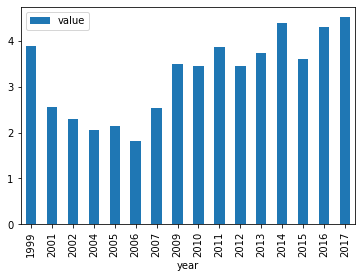

In [13]:
# creating the bar plot
df_pengeluaran.sort_values('year').plot(kind='bar', x='year', y='value')

# DataFrame Kekurangan Nutrisi (*Undernourishment*)

In [14]:
# Download query results.
query_string = """
SELECT
  data.year,
  data.indicator_code,
  data.indicator_name,
  data.value,
  series.topic,
  series.short_definition,
  series.long_definition
FROM
  worldbank_wdi.data AS DATA
INNER JOIN
  worldbank_wdi.series_description AS series
ON
  data.indicator_code = series.series_code
WHERE
  data.country_name = 'Indonesia'
  AND series.series_code LIKE 'SN.ITK.DEFC.ZS'
  AND series.topic LIKE 'Health%'
  AND series.indicator_name LIKE '%undernourishment%'
ORDER BY
  data.year ASC ;
"""

df = (
    bqclient.query(query_string)
    .result()
    .to_dataframe(
        # Optionally, explicitly request to use the BigQuery Storage API. As of
        # google-cloud-bigquery version 1.26.0 and above, the BigQuery Storage
        # API is used by default.
    )
)

In [15]:
df.shape

(19, 7)

In [16]:
df.head()

,year,indicator_code,indicator_name,value,topic,short_definition,long_definition
0,2001,SN.ITK.DEFC.ZS,Prevalence of undernourishment (% of population),19.2,Health: Nutrition,NULL,Prevalence of undernourishments is the percent...
1,2002,SN.ITK.DEFC.ZS,Prevalence of undernourishment (% of population),19.1,Health: Nutrition,NULL,Prevalence of undernourishments is the percent...
2,2003,SN.ITK.DEFC.ZS,Prevalence of undernourishment (% of population),18.9,Health: Nutrition,NULL,Prevalence of undernourishments is the percent...
3,2004,SN.ITK.DEFC.ZS,Prevalence of undernourishment (% of population),19.1,Health: Nutrition,NULL,Prevalence of undernourishments is the percent...
4,2005,SN.ITK.DEFC.ZS,Prevalence of undernourishment (% of population),19.2,Health: Nutrition,NULL,Prevalence of undernourishments is the percent...


In [17]:
df_undernourishment = df[['year', 'value']]
df_undernourishment

,year,value
0,2001,19.2
1,2002,19.1
2,2003,18.9
3,2004,19.1
4,2005,19.2
5,2006,19.0
6,2007,18.5
7,2008,17.4
8,2009,15.5
9,2010,13.0


In [18]:
df_undernourishment.to_csv('df_undernourishment.csv', encoding='utf-8', index=False)

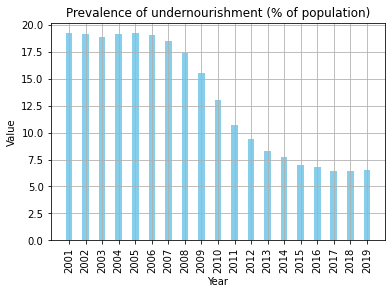

In [19]:
# creating the bar plot
plt.bar(df_undernourishment['year'], df_undernourishment['value'], color ='skyblue',
        width = 0.4)
 
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Prevalence of undernourishment (% of population)")
plt.xticks(df_undernourishment['year'], rotation ='vertical')
plt.grid(True)
plt.show()

# DataFrame Makanan Kurang Nutrisi (*Severe Food*)

In [20]:
# Download query results.
query_string = """
SELECT
  data.year,
  data.indicator_code,
  data.indicator_name,
  data.value,
  series.topic,
  series.short_definition,
  series.long_definition
FROM
  worldbank_wdi.data AS DATA
INNER JOIN
  worldbank_wdi.series_description AS series
ON
  data.indicator_code = series.series_code
WHERE
  data.country_name = 'Indonesia'
  AND series.series_code LIKE 'SN.ITK.SVFI.ZS'
  AND series.topic LIKE 'Health%'
  AND series.indicator_name LIKE '%severe food%'
ORDER BY
  data.year ASC ;
"""

df = (
    bqclient.query(query_string)
    .result()
    .to_dataframe(
        # Optionally, explicitly request to use the BigQuery Storage API. As of
        # google-cloud-bigquery version 1.26.0 and above, the BigQuery Storage
        # API is used by default.
    )
)

In [21]:
df.shape

(5, 7)

In [22]:
df.head()

,year,indicator_code,indicator_name,value,topic,short_definition,long_definition
0,2015,SN.ITK.SVFI.ZS,Prevalence of severe food insecurity in the po...,0.7,Health,NULL,The percentage of people in the population who...
1,2016,SN.ITK.SVFI.ZS,Prevalence of severe food insecurity in the po...,0.9,Health,NULL,The percentage of people in the population who...
2,2017,SN.ITK.SVFI.ZS,Prevalence of severe food insecurity in the po...,0.9,Health,NULL,The percentage of people in the population who...
3,2018,SN.ITK.SVFI.ZS,Prevalence of severe food insecurity in the po...,0.8,Health,NULL,The percentage of people in the population who...
4,2019,SN.ITK.SVFI.ZS,Prevalence of severe food insecurity in the po...,0.7,Health,NULL,The percentage of people in the population who...


In [23]:
df_severefood = df[['year', 'value']]
df_severefood

,year,value
0,2015,0.7
1,2016,0.9
2,2017,0.9
3,2018,0.8
4,2019,0.7


In [24]:
df_severefood.to_csv('df_severefood.csv', encoding='utf-8', index=False)

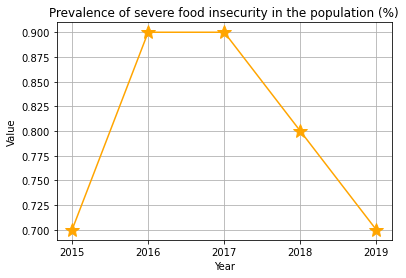

In [25]:
# creating the line plot
plt.plot(df_severefood['year'], df_severefood['value'], color ='orange', marker='*', ms=15)
 
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Prevalence of severe food insecurity in the population (%)")
plt.xticks(df_severefood['year'])
plt.grid(True)
plt.show()

# Visualisasi perbandingan antara *Undernourishment* dengan *Severe Food*

In [26]:
df_undernourishment = df_undernourishment.drop(labels=range(0, 14), axis=0)
df_undernourishment = df_undernourishment.reset_index(drop=True)
df_undernourishment = df_undernourishment.rename(columns={'value': 'undernourishment'})
df_undernourishment

,year,undernourishment
0,2015,7.0
1,2016,6.8
2,2017,6.4
3,2018,6.4
4,2019,6.5


In [27]:
df_severefood = df_severefood.rename(columns={'value': 'severefood'})
df_severefood

,year,severefood
0,2015,0.7
1,2016,0.9
2,2017,0.9
3,2018,0.8
4,2019,0.7


In [28]:
df_concat = pd.concat([df_undernourishment, df_severefood], axis=1)
df_concat.columns = ['year', 'undernourishment', 'year2', 'severefood']
df_concat.drop(df_concat.columns[2], axis=1, inplace=True)
# df_concat.set_index("year", inplace = True)
df_concat

,year,undernourishment,severefood
0,2015,7.0,0.7
1,2016,6.8,0.9
2,2017,6.4,0.9
3,2018,6.4,0.8
4,2019,6.5,0.7


In [29]:
df_concat.to_csv('df_gabungan.csv', encoding='utf-8', index=False)

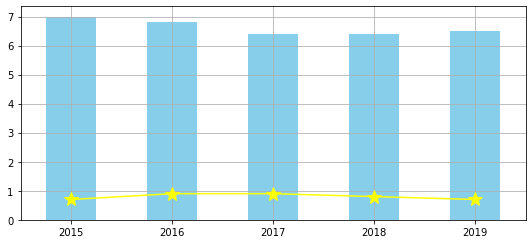

In [30]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df_concat['undernourishment'].plot(kind='bar', color='skyblue')
df_concat['severefood'].plot(kind='line', marker='*', color='yellow', ms=15)

ax.set_xticklabels(df_concat['year'])
plt.grid(True)
plt.show()